In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray

// Filter rerata(MEAN)

Shape citra 1 :  (228, 221)
Shape citra 2 :  (213, 236)


Text(0.5, 1.0, 'Citra 2')

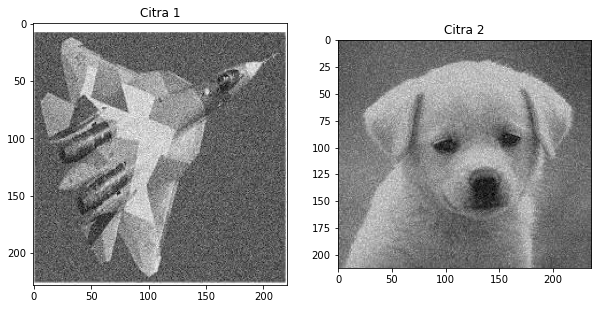

In [2]:
citra1 = imread(fname="noisy.jfif")
citra2 = imread(fname="dog.jfif")
citra1 = cv2.cvtColor(citra1, cv2.COLOR_RGB2GRAY)
citra2 = cv2.cvtColor(citra2, cv2.COLOR_RGB2GRAY)

print("Shape citra 1 : ", citra1.shape)
print("Shape citra 2 : ", citra2.shape)

fig, axes = plt.subplots(1,2, figsize=(10,10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Citra 2")

In [3]:
copyCitra1 = citra1.copy().astype(float)
copyCitra2 = citra2.copy().astype(float)

m1,n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

m2,n2 = copyCitra2.shape
output2 = np.empty([m2,n2])

print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', copyCitra1.shape)

print('m1 : ', m1)
print('n1 : ', n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 2 : ', copyCitra2.shape)

print('m2 : ', m2)
print('n2 : ', n2)
print()

Shape copy citra 1 :  (228, 221)
Shape output citra 1 :  (228, 221)
m1 :  228
n1 :  221

Shape copy citra 2 :  (213, 236)
Shape output citra 2 :  (213, 236)
m2 :  213
n2 :  236



In [4]:
for baris in range(0, m1-1): 
    for kolom in range(0, n1-1): 
        a1 = baris 
        b1 = kolom 
        jumlah = copyCitra1[a1-1, b1-1] + copyCitra1[a1-1, b1] + copyCitra1[a1-1, b1-1] +\
                 copyCitra1[a1, b1-1] + copyCitra1[a1, b1] + copyCitra1[a1, b1+1] +\
                 copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1]; 
        output1[a1, b1] = (1/9 * jumlah)

In [5]:
for baris in range(0, m2-1): 
    for kolom in range(0, n2-1): 
        a1 = baris 
        b1 = kolom 
        jumlah = copyCitra2[a1-1, b1-1] + copyCitra2[a1-1, b1] + copyCitra2[a1-1, b1-1] +\
                 copyCitra2[a1, b1-1] + copyCitra2[a1, b1] + copyCitra2[a1, b1+1] +\
                 copyCitra2[a1+1, b1-1] + copyCitra2[a1+1, b1] + copyCitra2[a1+1, b1+1]; 
        output2[a1, b1] = (1/9 * jumlah)

Text(0.5, 1.0, 'output citra 2')

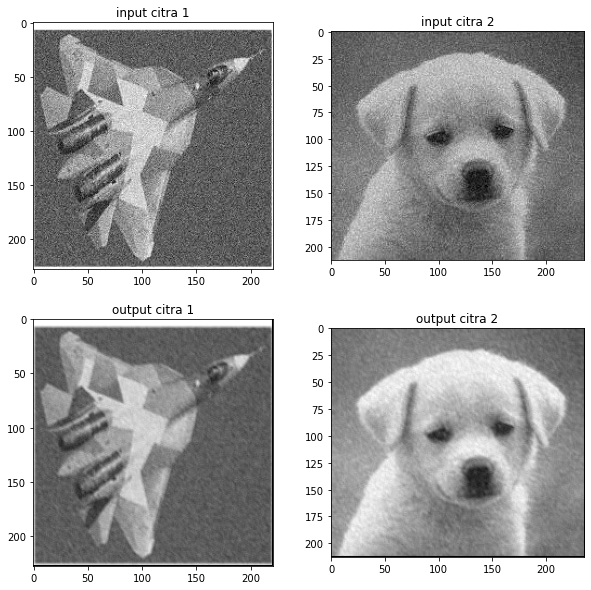

In [6]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("input citra 1")

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("input citra 2")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("output citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("output citra 2")

// Median dan Batas

In [7]:
img_median = cv2.imread('noisy.jfif')
img_median = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)
img_median_after = cv2.medianBlur(img_median, 5)

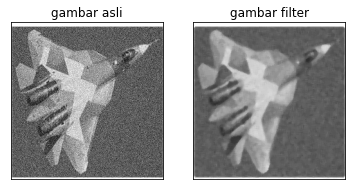

In [8]:
plt.subplot(121), plt.imshow(img_median), plt.title('gambar asli')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_median_after), plt.title('gambar filter')
plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
def filter_batas(data, filter_size):
    temp = []
    indexer = filter_size
    new_image = data.copy()
    nrow, ncol = data.shape
    
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m >  -1) and (m < ncol):
                            temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j]  > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp = []
        return new_image.copy()

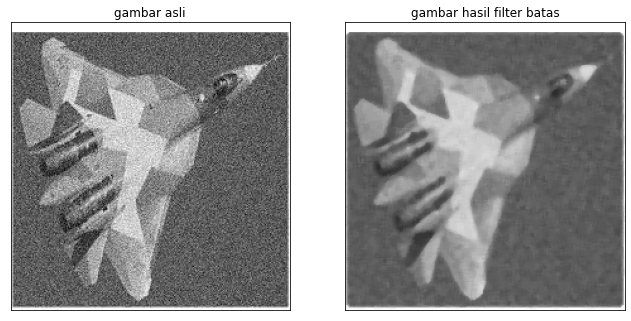

In [10]:
img_batas = cv2.imread('noisy.jpg')
img_batas_grey = cv2.cvtColor(img_median, cv2.COLOR_BGR2GRAY)
img_filter_batas = filter_batas(img_batas_grey, 9)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img_median), plt.title('gambar asli')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_median_after), plt.title('gambar hasil filter batas')
plt.xticks([]), plt.yticks([])

plt.show()

// Konvolusi

(228, 221, 3)


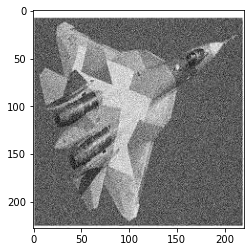

In [11]:
citra1 = imread(fname="noisy.jfif")
print(citra1.shape)

plt.imshow(citra1, cmap='gray')

Text(0.5, 1.0, 'Citra output')

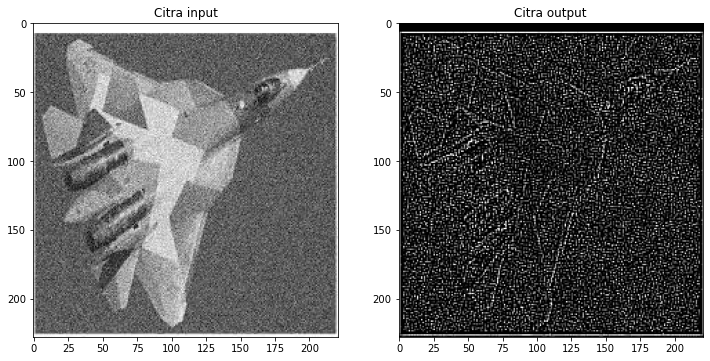

In [12]:
kernel = np.array([[-1, 0, -1],
                  [0, 4, 0],
                  [-1, 0, -1]])
citraOutput = cv2.filter2D(citra1, -1, kernel)

fig, axes = plt.subplots(1,2, figsize=(12,12))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Citra input")
ax[1].imshow(citraOutput, cmap = 'gray')
ax[1].set_title("Citra output")